In [26]:
# WCZYTYWANIE PLIKU Z DANYMI

import pandas as pd

df = pd.read_csv('inc.csv')
df.head()

,firm_id,ranking,workers,company,state_l,state_s,city,growth,revenue,industry,yrs_on_list
0,22890,1,227,Fuhu,California,CA,El Segundo,158956.9106,195640000,Consumer Products & Services,2
1,25747,2,191,Quest Nutrition,California,CA,El Segundo,57347.9246,82640563,Food & Beverage,1
2,25643,3,145,Reliant Asset Management,Virginia,VA,Arlington,55460.1646,85076502,Business Products & Services,1
3,26098,4,62,Superfish,California,CA,Palo Alto,26042.9630,35293000,Software,1
4,26182,5,92,Acacia Communications,Massachusetts,MA,Maynard,20690.4578,77652360,Telecommunications,1


In [19]:
# SPRAWDZENIE POPRAWNOSCI DANYCH

# 1. Sprawdzenie typow danych:
print(df.dtypes)
print()

# 2. Kolumny zawierające dane numeryczne:
# numeric = df.iloc[:,[0,1,2,7,8,10]]
print(numeric.columns)
print()
print('Number of missing values in numeric columns: ', numeric.isna().sum())
print()

# 3. Pozostałe kolumny:
others = df.iloc[:,[3,4,5,6,9]]
print(others.columns)
print()
print('Number of missing values in other columns: ', others.isnull().sum())

firm_id          int64
ranking          int64
workers          int64
company         object
state_l         object
state_s         object
city            object
growth         float64
revenue          int64
industry        object
yrs_on_list      int64
dtype: object

Index(['firm_id', 'ranking', 'workers', 'growth', 'revenue', 'yrs_on_list'], dtype='object')

Number of missing values in numeric columns:  firm_id        0
ranking        0
workers        0
growth         0
revenue        0
yrs_on_list    0
dtype: int64

Index(['company', 'state_l', 'state_s', 'city', 'industry'], dtype='object')

Number of missing values in other columns:  company     0
state_l     0
state_s     0
city        0
industry    0
dtype: int64


In [4]:
# PRZESYLANIE DANYCH DO BAZY DANYCH

# 1. Przygotowanie danych do przesyłania:

col = []
for i in df.columns:
    col.append(i)

def make_string(col_list):
    col_str = '('
    for i in range(len(col_list)):
        if i<len(col_list)-1:
            col_str += str(col_list[i])+','
        else:
            col_str += str(col_list[i])+')'
    return col_str

col_str = make_string(col)
print(col_str)

(firm_id,ranking,workers,company,state_l,state_s,city,growth,revenue,industry,yrs_on_list)


In [27]:
# 2. Połączenie z bazą i przesłanie danych

pip install mysqlclient

import MySQLdb

db_connection = MySQLdb.connect(host='localhost', user = 'root', passwd = '', db = 'project')
cur = db_connection.cursor()

for i in range(len(df.firm_id)):
    cur.execute("INSERT INTO inc2 "+ col_str + " VALUES ("+str(df.iloc[i,0])+","\
                +str(df.iloc[i,1])+","+str(df.iloc[i,2])+","+"'"+str(df.iloc[i,3])+"'"+","\
                +"'"+str(df.iloc[i,4])+"'"+","+"'"+str(df.iloc[i,5])+"'"+","\
                +"'"+str(df.iloc[i,6])+"'"+"," +str(df.iloc[i,7])+","+str(df.iloc[i,8])+","\
                +"'"+str(df.iloc[i,9])+"'"+","+ str(df.iloc[i,10])+");")
    db_connection.commit()
db_connection.close()

In [1]:
# POBIERANIE DANYCH Z BAZY I ZAPIS DO PLIKU (CSV):

db_connection = MySQLdb.connect(host='localhost', user = 'root', passwd = '', db = 'project')
cur = db_connection.cursor()
query = "SELECT * FROM inc2"
results = pd.read_sql_query(query, db_connection)
results.to_csv("output.csv", index=False)

import pandas as pd

df2 = pd.read_csv("output.csv")
df2.head()

,firm_id,ranking,workers,company,state_l,state_s,city,growth,revenue,industry,yrs_on_list
0,4,3036,45,INE,Washington,WA,Bellevue,117.4660,10023000.0,Education,4
1,8,1353,180,One Technologies,Texas,TX,Dallas,318.1760,249923000.0,Consumer Products & Services,8
2,11,3854,1700,ProKarma,Oregon,OR,Beaverton,80.0549,94149800.0,IT Services,3
3,16,2837,421,Snap Fitness,Minnesota,MN,Chanhassen,130.0500,66634000.0,Health,6
4,29,3322,144,iCore Networks,Virginia,VA,McLean,101.5820,46610900.0,Telecommunications,6


In [30]:
# STATYSTYKI OPISOWE

import numpy as np
import scipy.stats as sc
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt

def desc_statistics(column):
    print('MAX value = ', np.max(column))
    print('MIN value = ', np.min(column))
    print('MEAN value = ', np.mean(column))
    print('MEDIAN value = ', np.median(column))
    print('STD DEVIATION = ', st.stdev(column))
    print('STD DEVIATION (whole population) = ', st.pstdev(column))
    print('VARIANCE = ', st.variance(column))
    print('VARIANCE (whole population) = ', st.pvariance(column))
    print('UPPER MEDIAN = ', st.median_high(column))
    print('LOWER MEDIAN = ', st.median_low(column))    
    print('KURTOSIS = ', sc.kurtosis(column))
    print('SKEWNESS = ', sc.skew(column))
    

print('DESCRIPTIVE STATISTICS FOR REVENUE:')
print()
desc_statistics(df2.revenue)
print()
print('DESCRIPTIVE STATISTICS FOR GROWTH:') 
print()
desc_statistics(df2.growth)
print()
print('DESCRIPTIVE STATISTICS FOR WORKERS:')
print()
desc_statistics(df2.workers)

DESCRIPTIVE STATISTICS FOR REVENUE:

MAX value =  5528200000.0
MIN value =  1953000.0
MEAN value =  43058179.688
MEDIAN value =  10722100.0
STD DEVIATION =  181855862.84471977
STD DEVIATION (whole population) =  181837676.34906507
VARIANCE =  3.3071554850997532e+16
VARIANCE (whole population) =  3.3064940540027332e+16
UPPER MEDIAN =  10727200.0
LOWER MEDIAN =  10717000.0
KURTOSIS =  394.122766175678
SKEWNESS =  16.997007524623932

DESCRIPTIVE STATISTICS FOR GROWTH:

MAX value =  158957.0
MIN value =  42.446999999999996
MEAN value =  516.439929660001
MEDIAN value =  151.723
STD DEVIATION =  2786.06300893945
STD DEVIATION (whole population) =  2785.7843887068475
VARIANCE =  7762147.08978074
VARIANCE (whole population) =  7760594.660362784
UPPER MEDIAN =  151.735
LOWER MEDIAN =  151.711
KURTOSIS =  2159.0096443328516
SKEWNESS =  40.782957108577925

DESCRIPTIVE STATISTICS FOR WORKERS:

MAX value =  34219
MIN value =  0
MEAN value =  208.9698
MEDIAN value =  50.0
STD DEVIATION =  1074.60012

In [31]:
# ZAPIS DANYCH STATYSTYCZNYCH W BAZIE DANYCH

# 1. Przygotowanie danych do zapisu:

def add_to_list(column):
    value_list = []
    value_list.append(np.max(column))
    value_list.append(np.min(column))
    value_list.append(np.mean(column))
    value_list.append(np.median(column))    
    value_list.append(st.stdev(column))
    value_list.append(st.pstdev(column))
    value_list.append(st.variance(column))
    value_list.append(st.pvariance(column))
    value_list.append(st.median_high(column))
    value_list.append(st.median_low(column))    
    value_list.append(sc.kurtosis(column))
    value_list.append(sc.skew(column))
    return value_list

names=['revenue', 'growth', 'workers']
lists = []
lists.append(add_to_list(df2.revenue))
lists.append(add_to_list(df2.growth))
lists.append(add_to_list(df2.workers))

columns_in_DB = ['variables','max_value','min_value','mean_value','median_value','std_dev',\
                 'std_dev_p','variance_val','variance_p', 'upper_median','lower_median',\
                 'kurtosis','skewness']

col_str = make_string(columns_in_DB)

print(col_str)

(variables,max_value,min_value,mean_value,median_value,std_dev,std_dev_p,variance_val,variance_p,upper_median,lower_median,kurtosis,skewness)


In [32]:
# 2. Przesyłanie danych statystycznych do bazy

import MySQLdb

db_connection = MySQLdb.connect(host='localhost', user = 'root', passwd = '', db = 'project')
cur = db_connection.cursor()

for i in range(3):
    cur.execute("INSERT INTO descr_stats "+ col_str + " VALUES ("+"'"+str(names[i])+"'"+","\
                +str(lists[i][0])+","+str(lists[i][1])+","+str(lists[i][2])\
                +","+str(lists[i][3])+","+str(lists[i][4])+","+str(lists[i][5])\
                +","+str(lists[i][6])+","+str(lists[i][7])+","+str(lists[i][8])\
                +","+str(lists[i][9])+","+str(lists[i][10])+","+str(lists[i][11])+");")
    db_connection.commit()
db_connection.close()

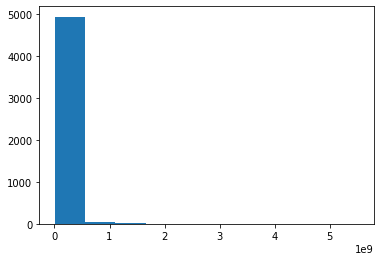

In [54]:
# TESTOWANIE HIPOTEZ STATYSTYCZNYCH

# 1. Badanie normalności rozkładu

# Graficzne badanie normalności rozkładu
# REVENUE
from matplotlib import pyplot
pyplot.hist(df2.revenue)

pyplot.show()

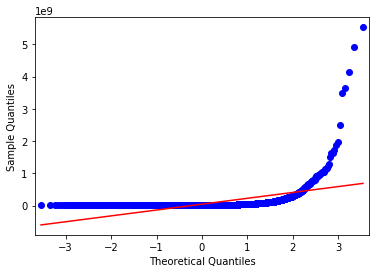

In [55]:
# Graficzne badanie normalności rozkładu
# REVENUE

from statsmodels.graphics.gofplots import qqplot
# from matplotlib import pyplot
qqplot(df2.revenue, line='s')
pyplot.show()

In [56]:
# Testy ststystyczne - badanie normalności rozkładu

# The Shapiro-Wilk test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df2.revenue)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Nie ma podstaw do odrzucenie H0 - prawdopodobnie rozkład NORMALNY')
else:
    print('Odrzucamy H0 - rozkład różni się od normalnego')

Statistics=0.172, p=0.000
Odrzucamy H0 - rozkład różni się od normalnego


In [57]:
# Testy ststystyczne - badanie normalności rozkładu

# D'Agostino test
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df2.revenue)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Nie ma podstaw do odrzucenie H0 - prawdopodobnie rozkład NORMALNY')
else:
    print('Odrzucamy H0 - rozkład różni się od normalnego')

Statistics=10222.450, p=0.000
Odrzucamy H0 - rozkład różni się od normalnego


In [58]:
# Testy ststystyczne - badanie normalności rozkładu

# Anderson-Darling test (Kolmogorov)
from scipy.stats import anderson

# normality test
result = anderson(df2.revenue)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, nie ma podstaw do odrzucenie H0\
        - prawdopodobnie rozkład NORMALNY' % (sl, cv))
    else:
        print('%.3f: %.3f, Odrzucamy H0 - rozkład różni się od normalnego' % (sl, cv))

Statistic: 1299.871
15.000: 0.576, Odrzucamy H0 - rozkład różni się od normalnego
10.000: 0.655, Odrzucamy H0 - rozkład różni się od normalnego
5.000: 0.786, Odrzucamy H0 - rozkład różni się od normalnego
2.500: 0.917, Odrzucamy H0 - rozkład różni się od normalnego
1.000: 1.091, Odrzucamy H0 - rozkład różni się od normalnego


In [97]:
# TESTOWANIE HIPOTEZ STATYSTYCZNYCH

# 2. Badanie równości wariancji

import scipy.stats as scs

group1 = df2[df2.yrs_on_list<=2]
group2 = df2[df2.yrs_on_list>2]

print('Test dla zmiennej revenue - podział wg lat na liście rankingowej (do 2, ponad 2)')
print()
gr1_gr2_var = scs.levene(group1.revenue, group2.revenue)
print('Statystyka T i prawdopodobienstwo dla wariancji group1-group2: ', gr1_gr2_var,'\n')
print()
print('Test dla zmiennej growth - podział wg lat na liście rankingowej (do 2, ponad 2)')
print()
gr1_gr2_var = scs.levene(group1.growth, group2.growth)
print('Statystyka T i prawdopodobienstwo dla wariancji group1-group2: ', gr1_gr2_var,'\n')


# NOTE:

# If the resulting p-value of Levene's test is less than some significance level (typically 0.05),
# the obtained differences in sample variances are unlikely to have occurred based on random sampling
# from a population with equal variances. Thus, the null hypothesis of equal variances is rejected
# and it is concluded that there is a difference between the variances in the population

Test dla zmiennej revenue - podział wg lat na liście rankingowej (do 2, ponad 2)

Statystyka T i prawdopodobienstwo dla wariancji group1-group2:  LeveneResult(statistic=22.61798877866917, pvalue=2.031829686741134e-06) 


Test dla zmiennej growth - podział wg lat na liście rankingowej (do 2, ponad 2)

Statystyka T i prawdopodobienstwo dla wariancji group1-group2:  LeveneResult(statistic=46.01732598429005, pvalue=1.3081691410002054e-11) 



In [99]:
# TESTOWANIE HIPOTEZ STATYSTYCZNYCH

# 3. Badanie równości średnich

print('Test dla grup niezależnych - zmienna revenue - podział wg lat na liście rankingowej\
(do 2, ponad 2)')
print()
gr1_gr2_nz = scs.ttest_ind(group1.revenue, group2.revenue)
print('Statystyka T i prawdopodobienstwo dla średnich group1-group2, grupy niezależne: ', gr1_gr2_nz)
print()
print()

# NOTE:
# We can use this test, if we observe two independent samples from the same or different population,
# e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average 
# (expected) value differs significantly across samples. If we observe a large p-value, for example 
# larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. 
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis
# of equal averages.

group = df2
print('Test dla grup zależnych - zmienne revenue i growth')
print()
group_rev_grow_z = scs.ttest_rel(group.revenue, group.growth)
print('Statystyka T i prawdopodobienstwo dla średnich group_rev_grow, grupy zależne: \
', group_rev_grow_z)

# NOTE:
# Examples for use are scores of the same set of student in different exams, or repeated sampling from
# the same units. The test measures whether the average score differs significantly across samples 
# (e.g. exams). If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot 
# reject the null hypothesis of identical average scores. If the p-value is smaller than the 
# threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.
# Small p-values are associated with large t-statistics.

Test dla grup niezależnych - zmienna revenue - podział wg lat na liście rankingowej(do 2, ponad 2)

Statystyka T i prawdopodobienstwo dla średnich group1-group2, grupy niezależne:  Ttest_indResult(statistic=-5.760690149367384, pvalue=8.878301887598616e-09)


Test dla grup zależnych - zmienne revenue i growth

Statystyka T i prawdopodobienstwo dla średnich group_rev_grow, grupy zależne:  Ttest_relResult(statistic=16.742031840536267, pvalue=2.9386907280908527e-61)


In [103]:
# TESTOWANIE HIPOTEZ STATYSTYCZNYCH

# 4. Testy dla wielu średnich - analiza wariancji

# ONE WAY ANOVA

# Czy to, ile lat firma jest na liście rankingowej ma wpływ na wysokość jej dochodów
# i na wzrost obrotów?

import scipy.stats as stats

# Tworzenie grup - podział wg lat w rankingu:
gr_1 = df2[df2.yrs_on_list<=1]
gr_2 = df2[(df2.yrs_on_list>1) & (df2.yrs_on_list<=3)]
gr_3 = df2[(df2.yrs_on_list>3) & (df2.yrs_on_list<=10)]

print('Podział na grupy wg lat w rankingu:\ndo 1\nod 1 do 3\nod 3 do 10')
print()
print('Analiza wariancji dla wartości REVENUE')
print()
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(gr_1.revenue, gr_2.revenue, gr_3.revenue)
print('F = '+str(fvalue) + '   p = ' + str(pvalue))
print()
print()
print('Analiza wariancji dla wartości GROWTH')
print()
fvalue, pvalue = stats.f_oneway(gr_1.growth, gr_2.growth, gr_3.growth)
print('F = '+str(fvalue) + '   p = ' + str(pvalue))

# NOTE:
# If the p value obtained from ANOVA analysis is significant (p < 0.05), we conclude that there are
# significant differences among the groups.

Podział na grupy wg lat w rankingu:
do 1
od 1 do 3
od 3 do 10

Analiza wariancji dla wartości REVENUE

F = 27.919005382910335   p = 8.754425398939139e-13


Analiza wariancji dla wartości GROWTH

F = 27.260964170499744   p = 1.678369231985204e-12


In [105]:
# TESTOWANIE HIPOTEZ STATYSTYCZNYCH

# 4. Testy dla wielu średnich - analiza wariancji

# ONE WAY ANOVA

# Czy to, ilu pracowników firma zatrudnia ma wpływ na wysokość jej dochodów
# i na wzrost obrotów?

import scipy.stats as stats

# Tworzenie grup - podział wg liczby pracowników:

gr_1a = df2[(df2.workers>=25) & (df2.workers<50)]
gr_2a = df2[(df2.workers>=50) & (df2.workers<100)]
gr_3a = df2[(df2.workers>=100) & (df2.workers<40000)]

print('Podział na grupy wg liczby pracowników:\nod 25 do 50\nod 50 do 100\nponad 100')
print()
print('Analiza wariancji dla wartości REVENUE')
print()
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(gr_1a.revenue, gr_2a.revenue, gr_3a.revenue)
print('F = '+str(fvalue) + '   p = ' + str(pvalue))
print()
print()
print('Analiza wariancji dla wartości GROWTH')
print()
fvalue, pvalue = stats.f_oneway(gr_1a.growth, gr_2a.growth, gr_3a.growth)
print('F = '+str(fvalue) + '   p = ' + str(pvalue))

# NOTE:
# If the p value obtained from ANOVA analysis is significant (p < 0.05), we conclude that there are
# significant differences among the groups.

Podział na grupy wg liczby pracowników:
od 25 do 50
od 50 do 100
ponad 100

Analiza wariancji dla wartości REVENUE

F = 88.57202939245234   p = 2.6574848631471316e-38


Analiza wariancji dla wartości GROWTH

F = 0.8087186713458976   p = 0.4455070119524055


In [10]:
# TESTOWANIE HIPOTEZ STATYSTYCZNYCH

# 4. Testy dla wielu średnich - analiza wariancji

# TWO-WAY ANOVA

# Czy to, ilu pracowników zatrudnia firma i ile lat jest na liście ma wpływ na jej dochód (REVENUE)
# i wzrost obrotów (GROWTH)?

# TWO WAY ANOVA pozwala sprawdzić wpływ każdego z tych czynników po kolei i wpływ ich obu
# naraz (interakcję) na zmienną zależną (revenue)


# Przygotowanie danych - tworzenie 2 nowych kolumn w zbiorze danych:
# kolumny z 3 kategoriami (poziomami) czynnika yrs_on_list - do roku, od roku do 3 lat
# i powyżej 3 lat, a także kolumny z 3 poziomami czynnika workers - od 25 do 50, od 50 do 100
# i powyżej 100.

yrs_on_list_1 = []

for i in range(len(df2.yrs_on_list)):
    if df2.yrs_on_list[i]<=1:
        yrs_on_list_1.append(1)
    elif (df2.yrs_on_list[i]>1) & (df2.yrs_on_list[i]<=3):
        yrs_on_list_1.append(2)
    else:
        yrs_on_list_1.append(3)



workers_1 = []

for i in range(len(df2.workers)):
    if (df2.workers[i]>=25) & (df2.workers[i]<50):
        workers_1.append(1)
    elif (df2.workers[i]>=50) & (df2.workers[i]<100):
        workers_1.append(2)
    else:
        workers_1.append(3)


df2['yrs_on_list_1'] = yrs_on_list_1
df2['workers_1'] = workers_1



# import odpowiednich modułów

import statsmodels.api as sm
from statsmodels.formula.api import ols

# obliczenia: TWO-WAY ANOVA dla REVENUE

model = ols('revenue ~ C(workers_1) + C(yrs_on_list_1) + \
             C(workers_1):C(yrs_on_list_1)', data=df2).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(workers_1),2.632689e+18,2.0,41.088228,1.999491e-18
C(yrs_on_list_1),1.989932e+18,2.0,31.056754,3.939685e-14
C(workers_1):C(yrs_on_list_1),8.441846e+17,4.0,6.587571,2.770525e-05
Residual,1.598968e+20,4991.0,NaN,NaN


In [11]:
# obliczenia: TWO-WAY ANOVA dla GROWTH

model = ols('growth ~ C(workers_1) + C(yrs_on_list_1) + \
             C(workers_1):C(yrs_on_list_1)', data=df2).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(workers_1),1.170696e+07,2.0,0.761517,4.670118e-01
C(yrs_on_list_1),4.177386e+08,2.0,27.173150,1.830792e-12
C(workers_1):C(yrs_on_list_1),7.484990e+06,4.0,0.243443,9.137319e-01
Residual,3.836385e+10,4991.0,NaN,NaN


In [17]:
# REGRESJA LINIOWA (JEDNEJ ZMIENNEJ)

# Regresja liniowa dla jednej zmiennej wyjaśniającej:

# czy liczba pracowników ma wpływ na dochód firmy?

import numpy as np
from sklearn.linear_model import LinearRegression

x=df2.workers.to_numpy().reshape((-1,1))
y=df2.revenue.to_numpy()

model = LinearRegression()
model.fit(x, y)

print('Wartość wyrazu wolnego = ', model.intercept_)
print('Wartość współczynnika przy x = ', model.coef_)
print('Współczynnik determinacji R^2 = ', model.score(x,y))

print('Wartości przewidywane dla y: \n', model.predict(x))

Wartość wyrazu wolnego =  33661939.58641896
Wartość współczynnika przy x =  [44964.58388524]
Współczynnik determinacji R^2 =  0.07059603622399535
Wartości przewidywane dla y: 
 [3.56853459e+07 4.17555647e+07 1.10101732e+08 ... 3.51907354e+07
 3.48310188e+07 3.54605229e+07]


In [18]:
# REGRESJA LINIOWA (JEDNEJ ZMIENNEJ)

# Regresja liniowa dla jednej zmiennej wyjaśniającej:

# czy liczba lat na liście rankingowej ma wpływ na dochód firmy?

x=df2.yrs_on_list.to_numpy().reshape((-1,1))
y=df2.revenue.to_numpy()

model = LinearRegression()
model.fit(x, y)

print('Wartość wyrazu wolnego = ', model.intercept_)
print('Wartość współczynnika przy x = ', model.coef_)
print('Współczynnik determinacji R^2 = ', model.score(x,y))

print('Wartości przewidywane dla y: \n', model.predict(x))

Wartość wyrazu wolnego =  5478750.882071637
Wartość współczynnika przy x =  [13693131.0326222]
Współczynnik determinacji R^2 =  0.022657161916655455
Wartości przewidywane dla y: 
 [6.02512750e+07 1.15023799e+08 4.65581440e+07 ... 1.91718819e+07
 1.91718819e+07 1.91718819e+07]


In [2]:
# REGRESJA LINIOWA (WIELU ZMIENNYCH)

# Regresja liniowa dla wielu zmiennych wyjaśniających:

# czy liczba pracowników, lata na liście rankingowej i wzrost mają wpływ na dochód firmy?


import numpy as np
from sklearn.linear_model import LinearRegression


# Przygotowanie zmienych objaśniających (lista list trójek wartości - po jednej wartości
# dla każdej zmiennej niezależnej)

ind_var = []

for i in range (len(df2.workers)):
    threes = []
    threes.append(df2.workers[i])
    threes.append(df2.yrs_on_list[i])
    threes.append(df2.growth[i])
    ind_var.append(threes)

x = np.array(ind_var)
y=df2.revenue.to_numpy()

model = LinearRegression()
model.fit(x, y)

print('Wartość wyrazu wolnego = ', model.intercept_)
print('Wartość współczynnika przy x = ', model.coef_)
print('Współczynnik determinacji R^2 = ', model.score(x,y))

print('Prognoza dla wartości 500, 4, 5789.89: \n', model.predict([[500,4,5789.89]]))

Wartość wyrazu wolnego =  2503002.5659140423
Wartość współczynnika przy x =  [4.26841279e+04 1.13188469e+07 1.10766010e+03]
Współczynnik determinacji R^2 =  0.08577333104505824
Prognoza dla wartości 500, 4, 5789.89: 
 [75533684.42488474]


In [3]:
# REGRESJA LINIOWA WIELU ZMIENNYCH - MODEL ZAAWANSOWANY (statsmodel)

# czy liczba pracowników, lata na liście rankingowej i wzrost mają wpływ na dochód firmy?

import numpy as np
import statsmodels.api as sm

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           8.54e-97
Time:                        22:11:05   Log-Likelihood:            -1.0196e+05
No. Observations:                5000   AIC:                         2.039e+05
Df Residuals:                    4996   BIC:                         2.040e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.503e+06   4.25e+06      0.589      0.5

In [7]:
print('Współczynnik determinacji R^2 = ', results.rsquared)
print()
print('Dopasowany (adjusted) współczynnik determinacji R^2 = ', results.rsquared_adj)
print()
print('Współczynniki regresji:', results.params)
print()
print()
print('Wartości przewidywane:\n', results.fittedvalues, sep='\n')
print()
print('Wartości przewidywane:\n', results.predict(x), sep='\n')

Współczynnik determinacji R^2 =  0.08577333104505824

Dopasowany (adjusted) współczynnik determinacji R^2 =  0.08522435586354016

Współczynniki regresji: [2.50300257e+06 4.26841279e+04 1.13188469e+07 1.10766010e+03]


Wartości przewidywane:

[4.98292885e+07 1.01089352e+08 1.09111234e+08 ... 1.54021556e+07
 1.50903534e+07 1.58199322e+07]

Wartości przewidywane:

[4.98292885e+07 1.01089352e+08 1.09111234e+08 ... 1.54021556e+07
 1.50903534e+07 1.58199322e+07]


In [ ]:
###################################################################################






#                          KONIEC ANALIZ STATYSTYCZNYCH






###################################################################################

In [29]:
# PRZYGOTOWANIE BAZY DANYCH 
# NA POTRZEBY PUNKTU 6 i 7 PROJEKTU ZALICZENIOWEGO

# Wczytywanie plików z danymi:

import pandas as pd

w='BD_pliki/'
ceny = pd.read_csv(w+'ceny.txt')
ceny.head()

,IdTowaru,cena
0,1,118.85
1,2,146.72
2,3,151.64
3,4,184.43
4,5,225.41


In [19]:
towary = pd.read_csv(w+'towary.txt', quotechar="'", encoding= 'unicode_escape')
towary.head()

,IdTowaru,KodTowaru,nazwaTowaru,jednostka,iloscwOpakowaniu,VAT,stanMagazynu
0,1,KT6135,"CELERON 430 1,8 GHz 512K BOX/800 - 64-bit",szt,1,7,12
1,2,KT2819,"CELERON 440 2,0 GHz 512K BOX/800 - 64-bit",szt,1,7,11
2,3,KT4058,"CELERON Dual-Core E1200 1,6 GHz 512K BOX/800 ...",szt,1,7,2
3,4,KT8867,"CELERON Dual-Core E1400 2,0 GHz 512K BOX/800 ...",szt,1,7,32
4,5,KT8167,Pentium Dual-Core E2200 2.2GHz 1MB BOX/800 - 6...,szt,1,7,13


In [76]:
szczegoly = pd.read_csv(w+'szczegoly.txt', quotechar="'", encoding= 'unicode_escape')
szczegoly.head()

,NrFaktury,IdTowaru,ilosc,cena
0,F1/2003,47,2.0,209.02
1,F1/2003,99,2.0,340.10
2,F1/2004,362,2.0,720.40
3,F1/2004,214,2.0,474.50
4,F1/2004,91,3.0,453.90


In [40]:
klienci = pd.read_csv(w+'klienci.txt', quotechar="'", encoding= 'unicode_escape', index_col= False)
klienci.head()

,NIP,nazwa,regonpesel,adres,kod,miasto,telefon,status
0,100-214-42-50,Pawel Rusek,51111200987,ul. Biezanowska 181,30-856,Lukow,(68)794-88-64,ind
1,467-923-35-26,Adam Lezny,43102172790,ul. Wilcza 4,94-591,Ostrow Wielkopolski,(73)660-92-16,ind
2,580-408-39-86,Adam Pozoga,44062382078,ul. Ks. W. Turka 8/43,42-717,Szczawno,(89)666-92-99,ind
3,936-883-57-69,Adam Powaga,56110496283,ul. Brzozowa 17,75-233,Gryfice,(14)589-14-24,ind
4,980-525-85-46,Adam Banaszczyk,40082541737,ul. Prudnicka 63,92-597,Ustka,(61)319-77-96,ind


In [22]:
faktury = pd.read_csv(w+'faktury.txt', quotechar="'", encoding= 'unicode_escape', index_col= False)
faktury.head()

,NrFaktury,DataFaktury,NIP,SposobPlatnosci
0,F1/2003,2003-01-01,558-73-64-209,gotowka
1,F2/2003,2003-01-01,391-536-88-57,przelew
2,F3/2003,2003-01-02,574-45-93-818,gotowka
3,F4/2003,2003-01-03,506-352-77-59,przelew
4,F5/2003,2003-01-03,401-727-86-88,przelew


In [52]:
# PRZESYLANIE DANYCH DO BAZY DANYCH

# 1. Przygotowanie danych do przesyłania:

# a) do tabeli towary

def make_list(df):
    col = []
    for i in df.columns:
        col.append(i)
    return col
    
col_str = make_string(make_list(towary)) # odwołanie do funkcji make_string utworzonej wcześniej
print(col_str)

(IdTowaru,KodTowaru,nazwaTowaru,jednostka,iloscwOpakowaniu,VAT,stanMagazynu)


In [53]:
import MySQLdb

db_connection = MySQLdb.connect(host='localhost', user = 'root', passwd = '', db = 'project')
cur = db_connection.cursor()
for i in range(len(towary.IdTowaru)):
    cur.execute("INSERT INTO towary "+ col_str + " VALUES ("+str(towary.iloc[i,0])+",'"\
                +str(towary.iloc[i,1])+"','"+str(towary.iloc[i,2])+"','"+str(towary.iloc[i,3])+"',"\
                +str(towary.iloc[i,4])+","+str(towary.iloc[i,5])+","+str(towary.iloc[i,6])+");")
    db_connection.commit()
db_connection.close()

In [54]:
# b) do tabeli ceny

col_str = make_string(make_list(ceny))
print(col_str)

(IdTowaru,cena)


In [55]:
db_connection = MySQLdb.connect(host='localhost', user = 'root', passwd = '', db = 'project')
cur = db_connection.cursor()
for i in range(len(ceny.IdTowaru)):
    cur.execute("INSERT INTO ceny "+ col_str + " VALUES ("+str(ceny.iloc[i,0])+","\
                +str(ceny.iloc[i,1])+");")
    db_connection.commit()
db_connection.close()

In [56]:
# c) do tabeli klienci

col_str = make_string(make_list(klienci))
print(col_str)

(NIP,nazwa,regonpesel,adres,kod,miasto,telefon,status)


In [57]:
db_connection = MySQLdb.connect(host='localhost', user = 'root', passwd = '', db = 'project')
cur = db_connection.cursor()
for i in range(len(klienci.NIP)):
    cur.execute("INSERT INTO klienci "+ col_str + " VALUES ("+"'"+str(klienci.iloc[i,0])+"','"\
                +str(klienci.iloc[i,1])+"','"+str(klienci.iloc[i,2])+"','"\
                +str(klienci.iloc[i,3])+"','"+str(klienci.iloc[i,4])+"','"\
                +str(klienci.iloc[i,5])+"','"+str(klienci.iloc[i,6])+"','"\
                +str(klienci.iloc[i,7])+"'"+");")
    db_connection.commit()
db_connection.close()

In [58]:
# d) do tabeli faktury

col_str = make_string(make_list(faktury))
print(col_str)

(NrFaktury,DataFaktury,NIP,SposobPlatnosci)


In [59]:
db_connection = MySQLdb.connect(host='localhost', user = 'root', passwd = '', db = 'project')
cur = db_connection.cursor()

for i in range(len(faktury.NrFaktury)):
    cur.execute("INSERT INTO faktury "+ col_str + " VALUES ("+"'"+str(faktury.iloc[i,0])+"','"\
                +str(faktury.iloc[i,1])+"','"+str(faktury.iloc[i,2])+"','"\
                +str(faktury.iloc[i,3])+"'"+");")
    db_connection.commit()
db_connection.close()

In [70]:
# e) do tabeli szczegoly

col_str = make_string(make_list(szczegoly))
print(col_str)

(NrFaktury,IdTowaru,ilosc,cena)


In [77]:
db_connection = MySQLdb.connect(host='localhost', user = 'root', passwd = '', db = 'project')
cur = db_connection.cursor()

for i in range(len(szczegoly.NrFaktury)):
    cur.execute("INSERT INTO szczegoly "+ col_str + " VALUES ("+"'"+str(szczegoly.iloc[i,0])+"',"\
                +str(szczegoly.iloc[i,1])+","+str(szczegoly.iloc[i,2])+","\
                +str(szczegoly.iloc[i,3])+");")
    db_connection.commit()
db_connection.close()